## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [7]:
df = pd.read_csv('titanic.csv', sep=',', index_col = 0)

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [8]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Ваші висновки:

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



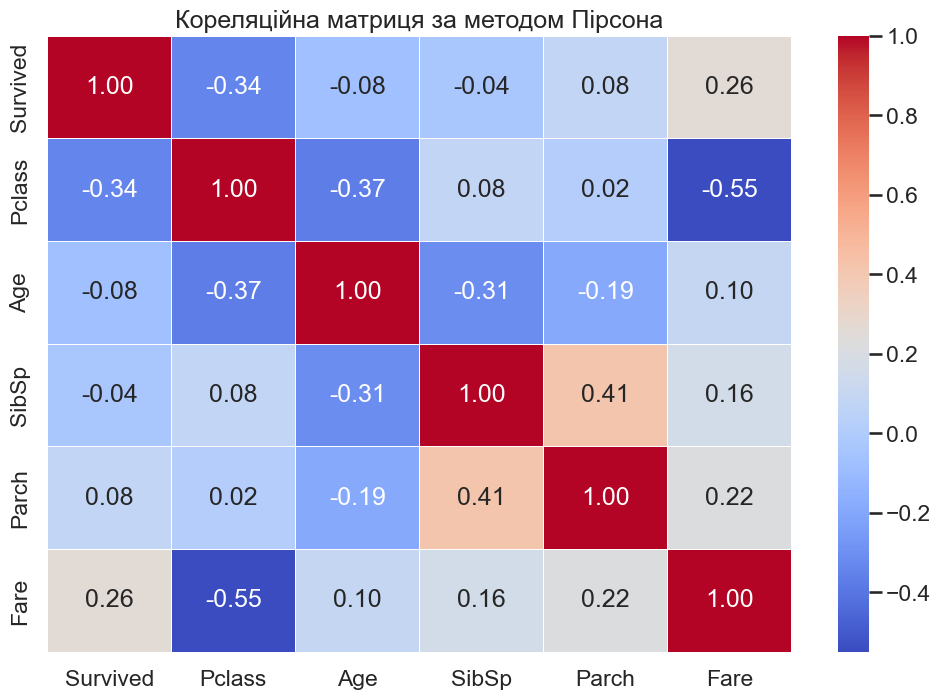

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Кореляційна матриця за методом Пірсона')
plt.show()

correlation_matrix



Ваші висновки:

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [15]:

def dataFrameCleaning(ds, attribute, listWithSomeAttributes):
    listWithSomeAttributes.append(attribute)

    for x in listWithSomeAttributes:
        
        if ds[x].dtypes == object:
            ds[x].replace(np.nan, ds[x].value_counts().idxmax(), inplace = True)
            
        if ds[x].dtypes == float or df[x].dtype == int:
            ds[x].replace(np.nan, ds[x].median(), inplace = True)
            
    return ds
dataFrameCleaning(df, "Cabin", ['Age', "Embarked"])




/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/1628547318.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds[x].replace(np.nan, ds[x].median(), inplace = True)
/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/1628547318.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S


Ваші висновки:

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





              Age Age_bin
PassengerId              
1            22.0       1
2            38.0       2
3            26.0       1
4            35.0       2
5            35.0       2


/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/2010688571.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_bin = df.groupby('Age_bin')['Survived'].sum()
/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/2010688571.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_age_bin.index, y=survival_by_age_bin.values, palette='viridis')


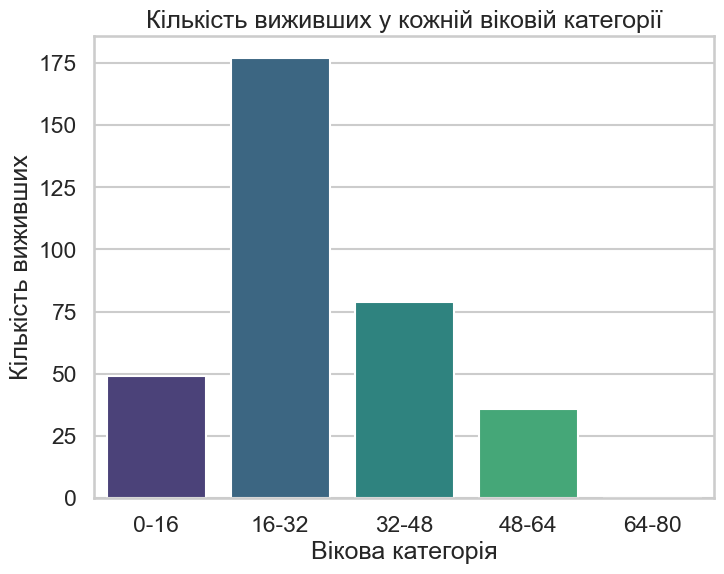

In [16]:

bins = [0, 16, 32, 48, 64, 80] 
labels = [0, 1, 2, 3, 4] 
df['Age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df[['Age', 'Age_bin']].head())

survival_by_age_bin = df.groupby('Age_bin')['Survived'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_age_bin.index, y=survival_by_age_bin.values, palette='viridis')

plt.title('Кількість виживших у кожній віковій категорії')
plt.xlabel('Вікова категорія')
plt.ylabel('Кількість виживших')
plt.xticks([0, 1, 2, 3, 4], ['0-16', '16-32', '32-48', '48-64', '64-80'])
plt.show()


Ваші висновки:

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

Середній рівень виживаності для кожної категорії Fare_bin:
Fare_bin
0    0.197309
1    0.303571
2    0.454955
3    0.581081
Name: Survived, dtype: float64


/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/3836409241.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_bin = df.groupby('Fare_bin')['Survived'].mean()
/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/3836409241.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_fare_bin.index, y=survival_by_fare_bin.values, palette='viridis')


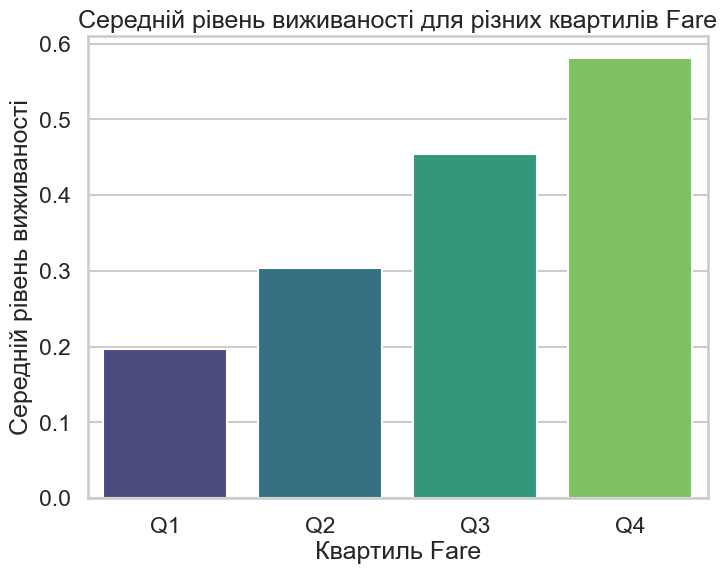

In [ ]:

df['Fare_bin'] = pd.qcut(df['Fare'], q=4, labels=[0, 1, 2, 3])


survival_by_fare_bin = df.groupby('Fare_bin')['Survived'].mean()


print("Середній рівень виживаності для кожної категорії Fare_bin:")
print(survival_by_fare_bin)

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_fare_bin.index, y=survival_by_fare_bin.values, palette='viridis')

plt.title('Середній рівень виживаності для різних квартилів Fare')
plt.xlabel('Квартиль Fare')
plt.ylabel('Середній рівень виживаності')
plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()


Ваші висновки:

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/4213788710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_alone.index, y=survival_by_alone.values, palette='viridis')


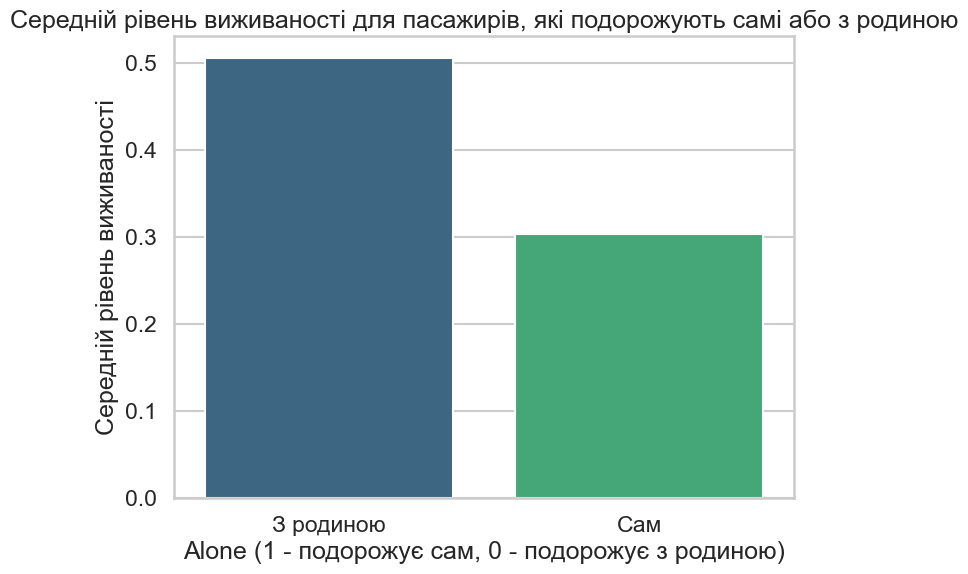

In [19]:

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_alone.index, y=survival_by_alone.values, palette='viridis')
plt.title('Середній рівень виживаності для пасажирів, які подорожують самі або з родиною')
plt.xlabel('Alone (1 - подорожує сам, 0 - подорожує з родиною)')
plt.ylabel('Середній рівень виживаності')
plt.xticks([0, 1], ['З родиною', 'Сам'])  # Це дозволяє замінити числа 0 і 1 на текст
plt.show()


Ваші висновки:

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [20]:

missing_values = df.isnull().mean() * 100
print("Пропущені значення в процентах для кожної колонки:\n", missing_values)

irrelevant_columns = ['Name', 'Ticket', 'Cabin']  
df.drop(columns=irrelevant_columns, inplace=True)

columns_with_missing_values = missing_values[missing_values > 50].index
df.drop(columns=columns_with_missing_values, inplace=True)

print("\nДатафрейм після видалення нерелевантних атрибутів та атрибутів з великою кількістю пропущених значень:")
print(df.head())

missing_values_after = df.isnull().sum()
print("\nКількість пропущених значень після видалення:\n", missing_values_after)


Пропущені значення в процентах для кожної колонки:
 Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.000000
Embarked       0.000000
Age_bin        0.112233
Fare_bin       0.000000
Family_size    0.000000
Alone          0.000000
dtype: float64

Датафрейм після видалення нерелевантних атрибутів та атрибутів з великою кількістю пропущених значень:
             Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
PassengerId                                                                   
1                   0       3    male  22.0      1      0   7.2500        S   
2                   1       1  female  38.0      1      0  71.2833        C   
3                   1       3  female  26.0      0      0   7.9250        S   
4                   1       1  female  35.0      1      0  53.1000        

Ваші висновки:

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [28]:

df['Sex'].replace(['male','female'],[0, 1], inplace=True)
df['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2], inplace=True)




/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/2313859215.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace(['male','female'],[0, 1], inplace=True)
/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/2313859215.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

Ваші висновки:

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/1962688877.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette='Set2')
/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/1962688877.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x=col, data=df, ax=ax, palette='Set2')
/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/1962688877.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, ax=ax, palette='Set2')
/var/folders/z7/qghqpgc54zsb827wnrl67j5c0000gn/T/ipykernel_3941/1962688877.py:10: UserWarning: Ignoring `palette` because no `hue` variable has be

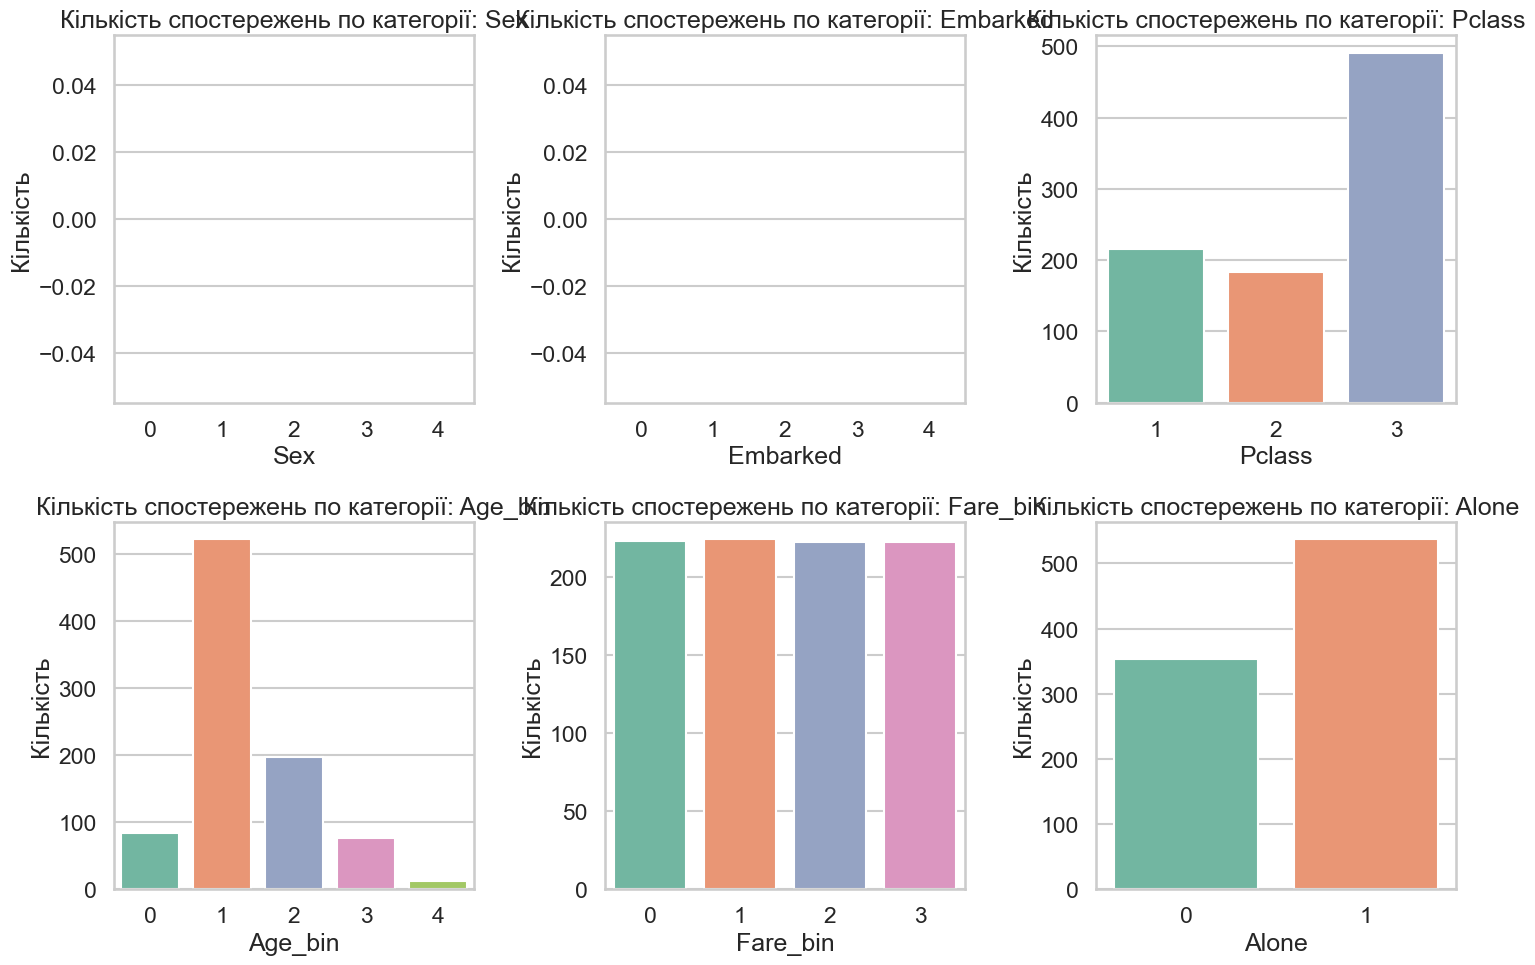

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Sex', 'Embarked', 'Pclass', 'Age_bin', 'Fare_bin', 'Alone']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, col in enumerate(categorical_columns):
    ax = axes[i // 3, i % 3]
    sns.countplot(x=col, data=df, ax=ax, palette='Set2')
    ax.set_title(f'Кількість спостережень по категорії: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Кількість')

plt.tight_layout()
plt.show()


Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

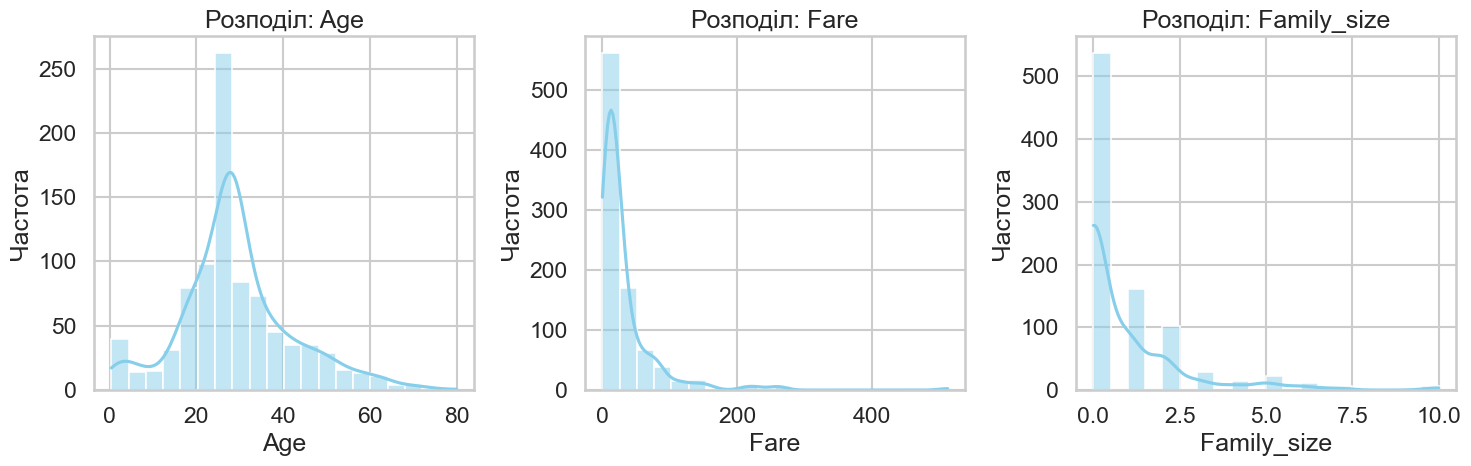

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_columns = ['Age', 'Fare', 'Family_size'] 

fig, axes = plt.subplots(1, len(numerical_columns), figsize=(15, 5)) 

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.histplot(df[col], bins=20, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Розподіл: {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()


Ваші висновки:

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

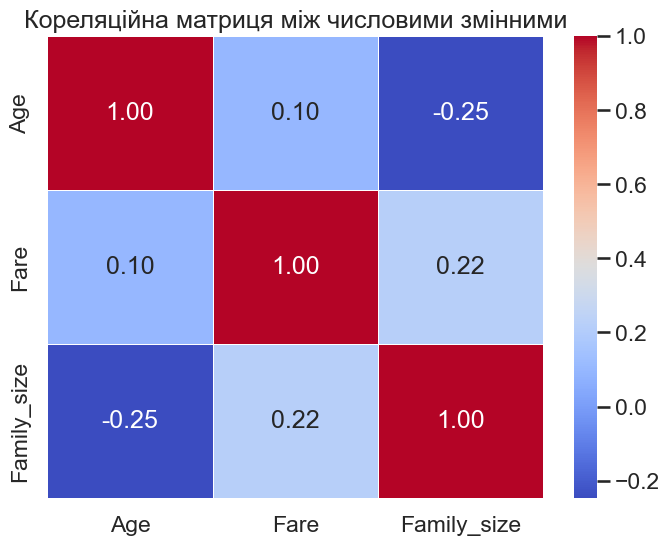

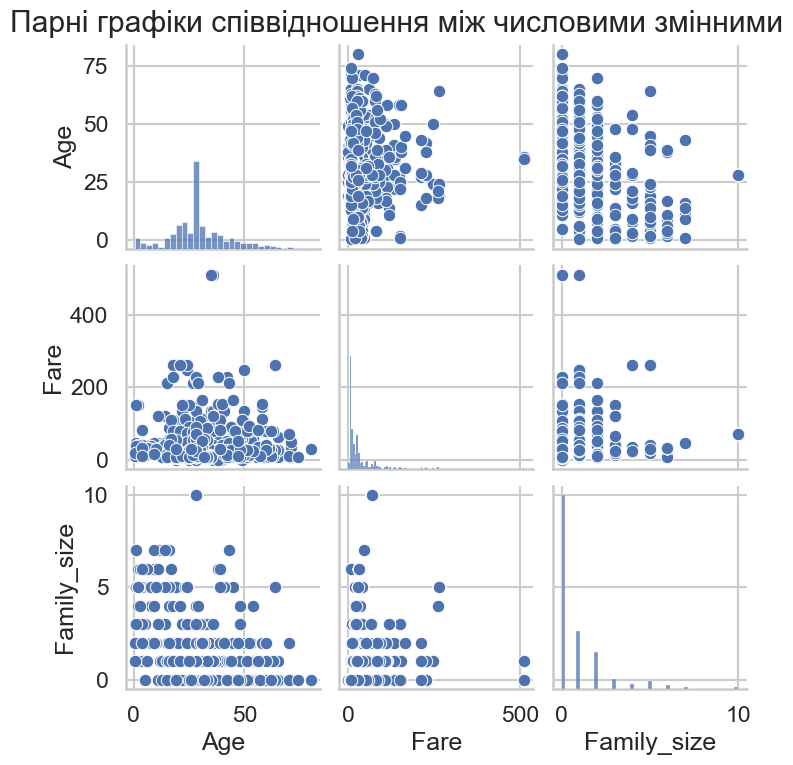

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Age', 'Fare', 'Family_size']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Кореляційна матриця між числовими змінними')
plt.show()

sns.pairplot(df[numerical_columns])
plt.suptitle('Парні графіки співвідношення між числовими змінними', y=1.02)
plt.show()


Ваші висновки:

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.